# MATH123-HW6
Ethan Harvey

In [1]:
import numpy as np
import pandas as pd

from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Question 1
(a)

$f(x) = (Ax-b)W^{T}W(Ax-b) = A^{T}x^{T}W^{T}WAx-2A^{T}x^{T}W^{T}Wb+b^{T}W^{T}Wb$

Setting the gradient equal to $0$

$\nabla_{x}f(x) = 2A^{T}W^{T}WAx-2A^{T}W^{T}Wb = 0$

$2A^{T}W^{T}WAx = 2A^{T}W^{T}Wb$

Dividing by $2$ we get

$A^{T}W^{T}WAx = A^{T}W^{T}Wb$

(b)

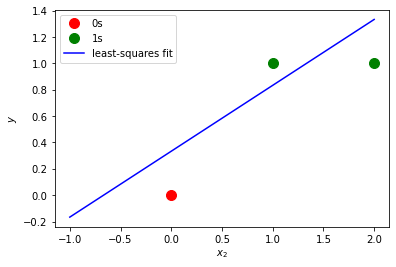

In [2]:
A = np.array([[1,0],[1,1],[1,2]])
b = np.array([[0],[1],[1]])
W = np.array([[1,0,0],[0,2,0],[0,0,1]])
parameters = np.linalg.inv(A.T@W.T@W@A)@A.T@W.T@W@b
# calculate slope and axis
m = parameters[1][0]
c = parameters[0][0]
x = A[:,1]
y = b[:,0]
# plot 
plt.plot(x[0], y[0], "ro", label="0s", markersize=10)
plt.plot(x[1:len(x)], y[1:len(y)], "go", label="1s", markersize=10)
plt.plot(np.array([-1,0,1,2]), m*np.array([-1,0,1,2])+c, "-b", label="least-squares fit")
plt.legend()
plt.xlabel("$x_{2}$")
plt.ylabel("$y$")
plt.show()

### Question 2

(a) As $C$ approaches infinity, having any non-zero slack variable would have infinite penalty and so all slack variables are set to 0 (we have a hard-margin SVM).

(b) For very small $C$, our margin is large (we have a soft-margin SVM). This means the road that divides our data is wide. It is easy for a model with a soft-margin to underfit the training data.

(c) For very large $C$, our margin is small (we have a hard-margin SVM). This means the road that divides our data is narrow. It is easy for a model with a hard-margin to overfit the training data.

### Question 3

(a)

#### Define Lagrangian

$L(w,b,a) = \frac{1}{2}w^{T}w - \sum_{i=1}^{n}a_{i}(y_{i}(w^{T}x_{i}+b)-1)$

#### Calculate partial derivatives of Lagrangian

$\frac{\partial L}{\partial w} = w - \sum_{i=1}^{n}a_{i}y_{i}x_{i} = 0$

$w = \sum_{i=1}^{n}a_{i}y_{i}x_{i}$

$\frac{\partial L}{\partial b} = \sum_{i=1}^{n}a_{i}y_{i} = 0$

#### Define the dual problem for SVM

$\begin{align*}
& \underset{a}{\text{maximize}}& & \sum_{i=1}^{n}a_{i} - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}a_{i}a_{j}y_{i}y_{j}(x_{i}\cdot x_{j}) \\
& \text{subject to}& & a_{i} \ge 0, i=1,\ldots, n \\
& & & \sum_{i=1}^{n}a_{i}y_{i} = 0
\end{align*}$

#### Solve dual problem to find Lagrange multipliers

In [3]:
X_train = np.array([[0,0],[2,2],[2,0],[3,0]])
y_train = np.array([[-1],[-1],[1],[1]])

def g(X, y, a):
    Xy = X*y
    return np.sum(a) - (0.5 * a.T @ (a.T @ (Xy @ Xy.T)))

constraints = ({'type': 'ineq', 'fun': lambda a: a},
               {'type': 'eq', 'fun': lambda a: np.dot(a, y_train)})

# use scipy to solve dual problem to find Lagrange multipliers
n_samples, n_features = X_train.shape
a0 = np.zeros(n_samples)
res = minimize(lambda a: -g(X_train, y_train, a), a0, constraints=constraints)
a = np.array(res.x)

# substitute into dual problem to find weights
w = np.zeros(X_train.shape[1])
for i in range(len(a)):
    if a[i] > 1e-8:
        w += (a[i] * y_train[i] * X_train[i])
        
# substitute into a support vector to find bias
y_train = np.reshape(y_train, n_samples) 
b = -0.5*(max(np.inner(w, X_train[y_train==-1]))+min(np.inner(w, X_train[y_train==1])))

print("a =", a)
print("w =", w)
print("b =", b)

a = [ 4.99999991e-01  4.99999978e-01  9.99999969e-01 -9.58434720e-16]
w = [ 0.99999998 -0.99999996]
b = -1.0000000087484766


(b) 

The explicit form for the classifier function is

$\hat{y} = sign(xw^{*}+b^{*})$

where $w^{*}$ is the column vector $(0.99999998, -0.99999996)$ and $b^{*} = -1.0000000087484766$.

(c)

In [4]:
X_test = np.array([[6,2],[1,1]])
print(np.where(X_test@w + b >= 0, 1.0, -1.0))

[ 1. -1.]


(d)

In [5]:
print(2/np.linalg.norm(w))

1.4142136060485608


(e) 

The equations for the support vectors are

$y = 0.4151159815191299+(0.99999998\times x_{1})-(0.99999996\times x_{2})$

$y = -2.4151159990160833+(0.99999998\times x_{1})-(0.99999996\times x_{2})$


### Question 4

In [6]:
data = pd.read_csv("data/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
X = data.drop(columns=["output"])
# one hot encode cp, restecg, slp, thall
for feature in ["cp","restecg","slp","thall"]:
    one_hot = pd.get_dummies(X[feature],prefix=feature+"_")
    X = X.drop(columns=[feature], axis = 1)
    X = X.join(one_hot)
y = data["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
try_params = {
    "C": np.logspace(-5, 5, base=10, num=100),
    "penalty": ["l1","l2"]
}
clf = LogisticRegression()
gscv = GridSearchCV(clf, try_params, cv=5, n_jobs=-1)
gscv.fit(X_train, y_train)
print("Best parameters found:\n", gscv.best_params_)

Best parameters found:
 {'C': 0.006734150657750821, 'penalty': 'l2'}


In [8]:
print(f"Train accuracy: {gscv.score(X_train, y_train)*100:.2f}%")
print(f" Test accuracy: {gscv.score(X_test, y_test)*100:.2f}%")

Train accuracy: 84.91%
 Test accuracy: 85.71%


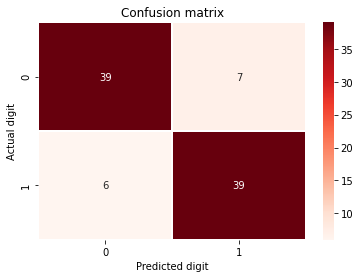

In [9]:
sns.heatmap(confusion_matrix(y_test, gscv.predict(X_test)), annot=True, linewidths=0.5, cmap='Reds')
plt.ylabel('Actual digit')
plt.xlabel('Predicted digit')
plt.title('Confusion matrix')
plt.show()

I chose to predict the `output` column (0 = less chance of heart attack, 1 = more chance of heart attack). After splitting the data into a train and test set, I used `GridSearchCV` to find the best inverse regularization strength and penalty. `GridSearchCV` uses cross validation to find the best specified hyperparameters. I assesed the validity of my model using accuracy and a confusion matrix. Accuracy shows the number of data points my model predicted correctly but the confusion matrix shows the number of false negatives and false positives my model predicted (which I can use to calculate percision and recall).